# $K$-Nearest Neighbors Algorithm

In [180]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

sns.set_theme()


In [181]:
df = pd.read_csv('D:/Study/UHD/6.Spring 2022/data 4319 final project/Major Project/0. Explore Data/df_workfile.csv')
# df.info()
df.drop(columns=df.columns[0], axis=1, inplace=True)

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [182]:
benign = df[df.diagnosis == 'B']
maglignant = df[df.diagnosis == 'M']

In [183]:
# X = df.drop('diagnosis', axis = 1).to_numpy()
X = df[['radius_mean', 'texture_mean']].to_numpy()

def make_labels(y):
    if y == "B":
        return 0
    else:
        return 1
    
y = df['diagnosis'].map(make_labels).to_numpy()
# y = np.where(y == "B", -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)




Text(0.5, 1.0, 'Linearly Seperable Data')

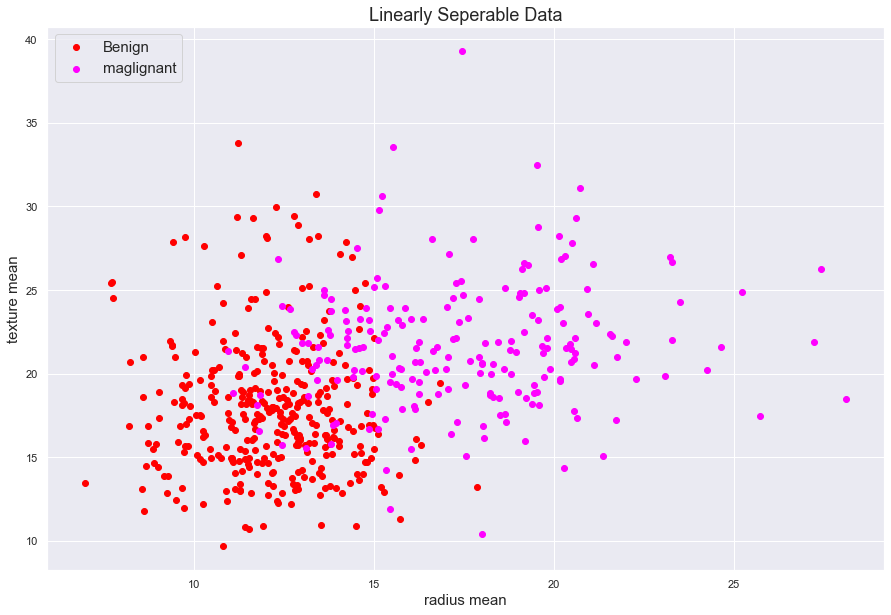

In [184]:
# Plot the data
plt.figure(figsize=(15,10))
plt.scatter(benign.radius_mean, 
            benign.texture_mean, 
            color = "red", 
            label = "Benign")
plt.scatter(maglignant.radius_mean, 
            maglignant.texture_mean, 
            color = "magenta", 
            label = "maglignant")
plt.xlabel("radius mean", fontsize = 15)
plt.ylabel("texture mean", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("Linearly Seperable Data", fontsize = 18)

In [185]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

# print(f"The distance between point 10 and 67 is {distance(X[10], X[560])}")

1. Build a function to calculate the $K$-Nearest Neighbors to a training dataset

In [186]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

2. After build a function to calculate the $KNN$, now we build a function to predict the target from the test dataset

In [187]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

3. To test how well the $KNN$ model work, we have to build a function to calculate the Calssification Error

In [188]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                      training_features, 
                                      training_labels, 
                                      k)
    return error/len(test_features)

4. To let $KNN$ Model work good, we need the choose the right value for $K$

In [189]:
possible_k = [k for k in range(2, 30, 1)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

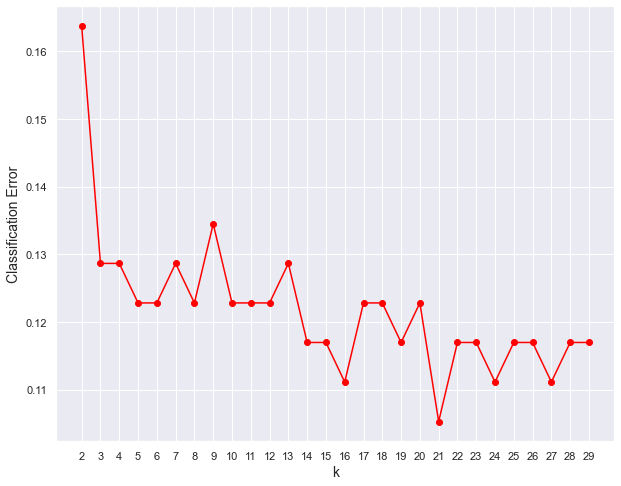

In [190]:
plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()

In [197]:
k_nearest_neighbors(X_test[-1], X_train, y_train, 21)

[[array([11.49, 14.59]), 0, 0.2692582403567251],
 [array([11.54, 14.44]), 0, 0.3201562118716431],
 [array([11.52, 14.93]), 0, 0.3255764119219947],
 [array([11.95, 14.96]), 0, 0.3420526275297419],
 [array([11.41, 14.92]), 0, 0.4022437072223756],
 [array([12.34, 14.95]), 0, 0.6539113089708722],
 [array([11.08, 14.71]), 0, 0.6603029607687673],
 [array([11.06, 14.83]), 0, 0.6942621983083911],
 [array([12.2 , 15.21]), 0, 0.6942621983083916],
 [array([11.06, 14.96]), 0, 0.7316419889536141],
 [array([11.04, 14.93]), 0, 0.7400000000000011],
 [array([11.71, 15.45]), 0, 0.7605918747922565],
 [array([12.21, 14.09]), 0, 0.7621679604916493],
 [array([11.43, 15.39]), 0, 0.7655716818169295],
 [array([12.  , 15.65]), 0, 0.9945853407325093],
 [array([10.66, 15.15]), 0, 1.1738824472663356],
 [array([10.88, 15.62]), 0, 1.266688596301395],
 [array([12.89, 14.11]), 0, 1.2879829191413996],
 [array([12.07, 13.44]), 0, 1.2928263611173776],
 [array([10.48, 14.98]), 0, 1.2929423807734048],
 [array([12.99, 14.23

In [198]:
KNN_Predict(X_test[-1], X_train, y_train, 21)

0

In [199]:
classification_error(X_test, y_test, X_train, y_train, 21)

0.10526315789473684

---
## $K$ Nearest Neighbors - Scikit Learn

In [200]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

KNN_model = KNeighborsClassifier(n_neighbors = 14)
KNN_model.fit(X_train, y_train)
predictions = KNN_model.predict(X_test)


In [215]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       102
           1       0.91      0.74      0.82        69

    accuracy                           0.87       171
   macro avg       0.88      0.85      0.86       171
weighted avg       0.87      0.87      0.86       171



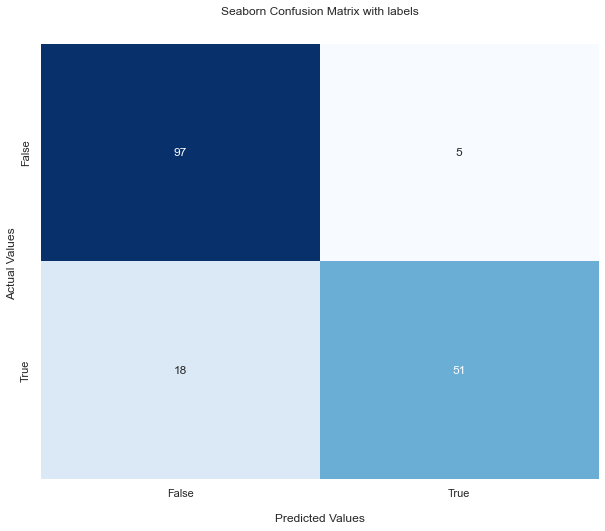

In [212]:
cf_matrix = confusion_matrix(y_test, predictions)
# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

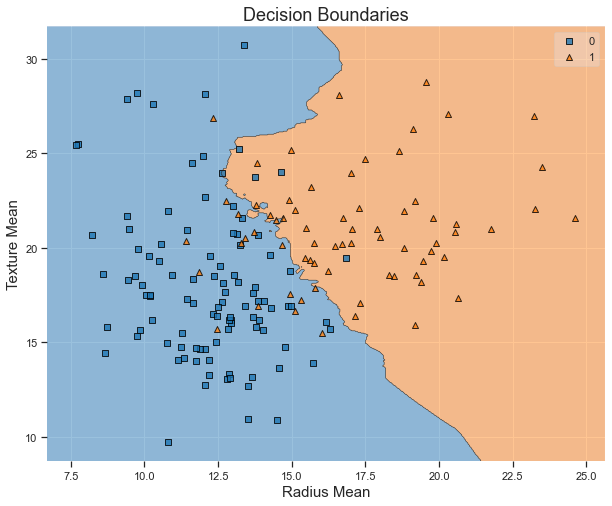

In [202]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X_test, y_test, clf = KNN_model)
plt.xlabel("Radius Mean", fontsize = 15)
plt.ylabel("Texture Mean", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
plt.show()